In [250]:
import sympy as s
import numpy as np
from sympy.abc import psi, kappa, x, omega, t
from numpy import cos, sin, tan 
from numpy import pi 

Part a) Sum the three waves

Amplitude

In [251]:
amplitudes = [5, 4, 2]
A2 = np.sum(np.square(amplitudes))
a = 2*4*2*cos(3*pi/2 - 2*pi) + 2*5*2*cos(3*pi/2)+ 2*4*2*cos(2*pi)
A_new = np.sqrt(a + A2)
A_new

7.810249675906654

Phase time!

In [252]:
tan_phase = ( 5*sin(3*pi/2) + 4*sin(2*pi) + 2*sin(0) ) / ( 5*cos(3*pi/2) + 4*cos(2*pi) + 2*cos(0) )
phase_new = np.arctan(tan_phase)
phase_new

-0.6947382761967034

In [253]:
eq4 = A_new*s.cos(t + phase_new) 
f4 = s.lambdify(t, eq4)

Part b) Graph all four waves

In [254]:
xvalues = np.arange(0, 30, .1)

In [255]:
eq1 = 5*s.cos(t + 3*pi/2) 
f1 = s.lambdify(t, eq1)
eq2 = 4*s.cos(t + 5*pi/2) 
f2 = s.lambdify(t, eq2)
eq3 = 2*s.cos(t) 
f3 = s.lambdify(t, eq3)

In [256]:
import matplotlib.pyplot as plt

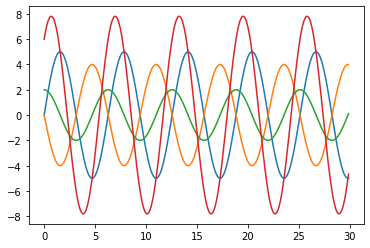

In [257]:
yvalues = f1(xvalues)
plt.plot(xvalues, yvalues)

yvalues = f2(xvalues)
plt.plot(xvalues, yvalues)

yvalues = f3(xvalues)
plt.plot(xvalues, yvalues)

yvalues = f4(xvalues)
plt.plot(xvalues, yvalues)

2)

Constructive:
All that needs to happen is that the amplitude and phases are the same

Destructive:
Amplitudes are again equal but now the phases are differenced (is that a word) by some integer factor of pi

3)

First 5 terms of the Fourier Series

In [258]:
del pi
from sympy.abc import pi, n
a0 = s.integrate(x, (x, 0, pi)) / pi 
a0

pi/2

In [259]:

an = s.integrate(x*s.cos(n*x), x)
an

Piecewise((x*sin(n*x)/n + cos(n*x)/n**2, Ne(n, 0)), (x**2/2, True))

In [260]:
an = an.args[0][0].subs(s.cos(n*x), (-1)**n)
af = an.subs(s.sin(n*x), 0) / pi - 1/(pi*n**2)
af

(-1)**n/(n**2*pi) - 1/(n**2*pi)

The previous holds true when n is even. a_n is 0 if n is odd

In [261]:
bn = s.integrate(x*s.sin(n*x), x)
bn


Piecewise((-x*cos(n*x)/n + sin(n*x)/n**2, Ne(n, 0)), (0, True))

In [262]:

bf = bn.args[0][0].subs({ s.cos(n*x): (-1)**n })
bf = bf.subs({ s.sin(n*x): 0, x: pi }) / pi
bf

-(-1)**n/n

 $+1/n$ if n is odd

$ -1/n $ if n is even

In [281]:
f1= s.lambdify(n, af)
f2= s.lambdify(n, bf)

xvalues = np.arange(0, 25, 1)
y1 = f1(xvalues)
y2 = f2(xvalues)

<lambdifygenerated-117>:2: RuntimeWarning: divide by zero encountered in true_divide
  return -(-1)**n/n


In [282]:
a_series = [a0, f1(1), f1(2), f1(3), f1(4), f1(5)]
b_series = [f2(1), f2(2), f2(3), f2(4), f2(5)]

In [283]:
a_series

[pi/2, -2/pi, 0, -2/(9*pi), 0, -2/(25*pi)]

In [284]:
b_series

[1.0, -0.5, 0.3333333333333333, -0.25, 0.2]

I got the first five terms right I'm just having trouble plotting it. the 'a' series looks weird (the blue line)

<lambdifygenerated-119>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 0.318309886183791*(-1)**n/n**2 - 0.318309886183791/n**2
<lambdifygenerated-119>:2: RuntimeWarning: invalid value encountered in subtract
  return 0.318309886183791*(-1)**n/n**2 - 0.318309886183791/n**2


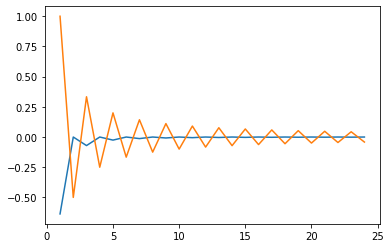

In [288]:
import matplotlib.pyplot as plt

aff = af.subs(pi, np.pi)
f3 = s.lambdify(n, aff)
y3 = f3(xvalues)

# plt.ylim(bottom=0)
plt.plot(xvalues, y3, y2)